Install the lastest widgets code...

```conda install -c conda-forge ipywidgets```

In [1]:
from ipywidgets import Dropdown, RadioButtons, VBox, FloatSlider
from IPython.display import display

In [2]:
data_type = RadioButtons(options=['sequential', 'diverging', 'qualitative'])

bindings = {'sequential': range(3,9+1),
            'diverging': range(3,11+1),
            'qualitative': range(3,12+1)}

class_val = Dropdown(options=bindings[data_type.value])    

def type_change(change):
    class_val.options = bindings[change['new']]

data_type.observe(type_change, names=['value'])

display(VBox([data_type, class_val]))

In [3]:
"""
data_type = RadioButtons(options=['sequential', 'diverging', 'qualitative'])

bindings = {'sequential': range(3,9+1),
            'diverging': range(3,11+1),
            'qualitative': range(3,12+1)}

class_val = Dropdown(options=bindings[data_type.value])    

def type_change(change):
    class_val.options = bindings[change['new']]

data_type.observe(type_change, names=['value'])

display(VBox([data_type, class_val]))
"""
# on data_type change update list of color maps
# based on class_val and data_type

from pysal.contrib.viz.color import color_display_types

dt = sorted(color_display_types.keys(), reverse=True)
data_type = RadioButtons(description='Data Type', options=dt)
bindings = {}
for t in dt:
    bindings[t] = color_display_types[t].keys()
    
cmap = Dropdown(description='CMap:', options=bindings[data_type.value])

def type_change(change):
    with cmap.hold_trait_notifications():
        cmap.options = bindings[change['new']]

data_type.observe(type_change, names=['value'])

display(VBox([data_type, cmap]))



In [4]:
"""
data_type = RadioButtons(options=['sequential', 'diverging', 'qualitative'])

bindings = {'sequential': range(3,9+1),
            'diverging': range(3,11+1),
            'qualitative': range(3,12+1)}

class_val = Dropdown(options=bindings[data_type.value])    

def type_change(change):
    class_val.options = bindings[change['new']]

data_type.observe(type_change, names=['value'])

display(VBox([data_type, class_val]))
"""
# on data_type change update list of color maps
# based on class_val and data_type

from pysal.contrib.viz.color import color_display_types
from pysal.contrib.viz.color import plot_cmaps as pcmaps

dt = sorted(color_display_types.keys(), reverse=True)
data_type = RadioButtons(description='Data Type', options=dt)
bindings = {}
for t in dt:
    bindings[t] = color_display_types[t].keys()
    
cmap = Dropdown(description='CMap:', options=bindings[data_type.value])

def type_change(change):
    with cmap.hold_trait_notifications():
        cmap.options = bindings[change['new']]

data_type.observe(type_change, names=['value'])  

display(VBox([data_type, cmap]))



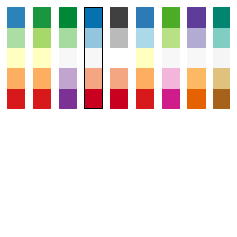

In [5]:
%matplotlib inline
from pysal.contrib.viz.color import plot_cmaps 
plot_cmaps('diverging', selected=3)

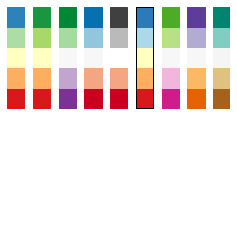

In [6]:
plot_cmaps('diverging', 5)

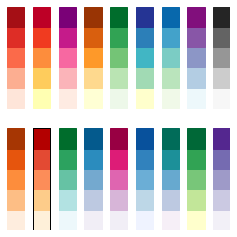

In [7]:
plot_cmaps('sequential', 10)

In [8]:
"""
data_type = RadioButtons(options=['sequential', 'diverging', 'qualitative'])

bindings = {'sequential': range(3,9+1),
            'diverging': range(3,11+1),
            'qualitative': range(3,12+1)}

class_val = Dropdown(options=bindings[data_type.value])    

def type_change(change):
    class_val.options = bindings[change['new']]

data_type.observe(type_change, names=['value'])

display(VBox([data_type, class_val]))
"""
# on data_type change update list of color maps
# based on class_val and data_type

from pysal.contrib.viz.color import color_display_types

dt = sorted(color_display_types.keys(), reverse=True)
data_type = RadioButtons(description='Data Type', options=dt)
bindings = {}
for t in dt:
    bindings[t] = color_display_types[t].keys()
    
cmap = Dropdown(description='CMap:', options=bindings[data_type.value])

def type_change(change):
    with cmap.hold_trait_notifications():
        cmap.options = bindings[change['new']]

data_type.observe(type_change, names=['value'])

display(VBox([data_type, cmap]))



In [12]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget)

NameError: name 'interact' is not defined

In [ ]:
import pysal as ps
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv
%matplotlib inline

In [ ]:
from ipywidgets import interact
interact(draw_map, lamb=(-0.9, 0.9))

In [ ]:
def draw_map(lamb):
    s = 20
    n = s**2
    w = ps.lat2W(s, s, rook=False)
    w.transform = 'R'
    e = np.random.random((n, 1))
    u = inv(np.eye(n) - lamb * w.full()[0])
    u = np.dot(u, e)
    ul = ps.lag_spatial(w, u)
    u = (u - u.mean()) / np.std(u)
    ul = (ul - ul.mean()) / np.std(ul)
    gu = u.reshape((s, s))
    # Figure
    f = plt.figure(figsize=(9, 4))
    ax1 = f.add_subplot(121)
    ax1.matshow(gu, cmap=plt.cm.YlGn)
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    #---
    ax2 = f.add_subplot(122)
    sc = ax2.scatter(u, ul, linewidth=0)
    ols = ps.spreg.OLS(ul, u)
    tag = "b = %.3f"%ols.betas[1][0]
    ax2.plot(u, ols.predy, c='red', label=tag)
    ax2.axvline(0, c='0.5')
    ax2.axhline(0, c='0.5')
    ax2.legend()
    plt.xlabel('u')
    plt.ylabel('Wu')
    plt.suptitle("$\lambda$ = %.2f"%lamb)
    plt.show()